# Applications

## Dimensionality Reduction

Dimensionality reduction is a technique that is used to reduce the number of features in a dataset. 

Reducing the number of features of a dataset is desirable for the following reasons:

1. It reduces the time and storage space required and subsequently reduces the computation time.

2. It removes redundant features and the overcome the [curse of dimensionality]().

```{admonition} Curse of dimensionality ☠️
:class: note
The curse of dimensionality refers to the fact that **for each additional feature, the number of training examples required to train the machine learning algorithm grows exponentially**. This is because the volume of the space increases so fast that the available data become sparse. 
```

3. It allows us to visualize high-dimensional data in a 2-dimensional or 3-dimensional space.



In [23]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc272/main/data/chat_dataset.csv')
data.head()

message sentiment
0          I really enjoyed the movie  positive
1               The food was terrible  negative
2  I'm not sure how I feel about this   neutral
3           The service was excellent  positive
4              I had a bad experience  negative

In [24]:
# creating bow representation
vocab = (' '.join(data['message'].values)).lower().split()
bow = pd.DataFrame(columns=vocab)
for word in vocab: 
    bow[word] = data['message'].apply(lambda msg: msg.count(word))

In [25]:
def l2_norm(x):
    return (sum(x**2))**(1/2)

bow_unit = bow.apply(lambda x: x/l2_norm(x), axis=1)

In [26]:
from sklearn.decomposition import PCA

# n_components indicates how many dimensions
# you want your data to be reduced to
pca = PCA(n_components = 2)

bow_reduced = pca.fit_transform(bow)

bow_reduced = pd.DataFrame(bow_reduced)

In [27]:
bow_reduced.head()

0          1
0 -13.183063 -13.360581
1 -14.616593 -13.413976
2 -11.650563 -15.537625
3 -14.605181 -13.347637
4 -16.310469   5.483213

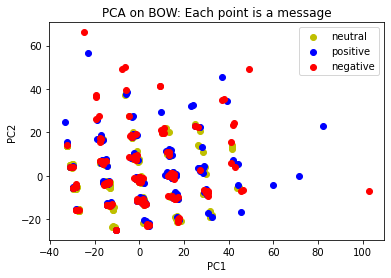

In [28]:
from matplotlib import pyplot as plt 

labels = data['sentiment'].replace({'neutral':0, 'positive':1, 'negative':-1})

pos = bow_reduced[labels==1]
neg = bow_reduced[labels==-1]
neu = bow_reduced[labels==0]

plt.scatter(neu[0], neu[1], c='y', label='neutral');
plt.scatter(pos[0], pos[1], c='b', label='positive');
plt.scatter(neg[0], neg[1], c='r', label='negative');

plt.legend();

plt.title('PCA on BOW: Each point is a message');
plt.xlabel('PC1');
plt.ylabel('PC2');

It is important to point out that **dimensionality reduction is not the same as feature selection**. The main difference is that in dimensionality reduction, we **transform** the data in a lower dimensional space while in feature selection we **select** a subset of the original features. In other words, PC1 and PC2 are linear combinations of the original features, while the features selected in feature selection are the original features.

## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm that can be used for both classification and regression problems. KNN is a non-parametric, lazy learning algorithm that classifies a data point based on the $k$ data points that are nearest to it. KNN does not make any assumptions on the underlying data distribution. 

Note that nearest points (observations) can be found by multiplying the matrix representation of observations by its transpose. The resulting matrix contains the distances between all pairs of observations. 

Once you have the similarity matrix, you can find the $k$ nearest neighbors of a particular observation by sorting the row of the similarity matrix corresponding to that observation.

Your prediction can then be mean or median of the target values of the $k$ nearest neighbors.


## Recommender Systems

Recommender systems are a type of information filtering system that are used to predict the rating or preference that a user would give to an item. They are widely used in e-commerce, entertainment, and social media platforms. Recommender systems are of two types:

Nearest Neighbors (KNN) are often used to build recommender systems. Recommender systems are used to recommend items to users based on their past preferences. 

<center><img width="80%" src="https://miro.medium.com/v2/resize:fit:1064/1*aSq9viZGEYiWwL9uJ3Recw.png"></center>

### Collaborative Filtering

Collaborative filtering is a technique that is used to filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

Nearest Neighbors (KNN) are used to find the users that are similar to a particular user. The items that are liked by the similar users are then recommended to the particular user.



In [36]:
import pandas as pd

data = pd.read_csv('../data/bratings.csv', index_col=0)

data['title'] = data['Title'].apply(lambda x: x[:10]+"...")

For instance, in the data above, if we wanted to recommend a book to user `JohnPal`, we would just find the most similar user using Nearest Neighbor and recommend what the most similar user liked that `JohnPal` hasn't read. 

This would require re-formatting the data to a form where **each row represents a user and each column is a book**. 

In [37]:
unique_titles = list(data['title'].unique())

def agg_user(grobj):
    user_titles = list(grobj['title'].unique())
    vec = pd.Series(0, index=unique_titles)
    vec.loc[user_titles] = 1
    return vec

data.groupby('profileName').apply(agg_user)

Gods and K...  The Mayor ...  \
profileName                                                                 
! Metamorpho ;) "Reflective and Wiser Seer"              0              0   
"                                                        0              0   
"-thewarlock-"                                           0              0   
"24heineck"                                              0              0   
"350am"                                                  0              0   
...                                                    ...            ...   
~LEON~                                                   0              0   
~Storm~                                                  0              0   
~S~                                                      0              0   
~Terry~                                                  0              0   
~auntysue~                                               0              0   

                                             Blessings...  Stitch 'N ...  \
profileName                                                                
! Metamorpho ;) "Reflective and Wiser Seer"             0              0   
"                                                       0              0   
"-thewarlock-"                                          0              0   
"24heineck"                                             0              0   
"350am"                                                 0              0   
...                                                   ...            ...   
~LEON~                                                  0              0   
~Storm~                                                 0              0   
~S~                                                     0              0   
~Terry~                                                 0              0   
~auntysue~                                              0              0   

                                             Why Men Lo...  Red Storm ...  \
profileName                                                                 
! Metamorpho ;) "Reflective and Wiser Seer"              0              0   
"                                                        0              0   
"-thewarlock-"                                           0              0   
"24heineck"                                              0              0   
"350am"                                                  0              0   
...                                                    ...            ...   
~LEON~                                                   0              0   
~Storm~                                                  0              0   
~S~                                                      0              0   
~Terry~                                                  1              0   
~auntysue~                                               0              0   

                                             Great Expe...  Sex, Drugs...  \
profileName                                                                 
! Metamorpho ;) "Reflective and Wiser Seer"              0              0   
"                                                        0              0   
"-thewarlock-"                                           0              0   
"24heineck"                                              0              0   
"350am"                                                  0              0   
...                                                    ...            ...   
~LEON~                                                   0              0   
~Storm~                                                  0              0   
~S~                                                      0              0   
~Terry~                                                  0              0   
~auntysue~                                               0              0   

                                             A Cro

### Content Based Filtering

Content based filtering is a technique that is used to filter out items that a user might like on the basis of the description of the item itself. It works by creating a profile of the user's interests based on the items that the user has liked in the past. It then recommends items that match the user's profile.

Nearest Neighbors (KNN) are used to find the items that are similar to the items that a user has liked in the past. The similar items are then recommended to the user.



In [22]:
data = pd.read_csv('../data/imdb_top_1000.csv')
data.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

In the data above, for instance, if a user liked `The Shawshank Redemption` then you need to find the most-similar movie (not the user) using Nearest Neighbor and recommend that to the user. 

## Social Media Feeds

Social media platforms such as Facebook, Twitter, and Instagram use recommender systems to recommend posts to users. The posts that are recommended to a user are based on the posts that the user has liked in the past.

<center><img width="50%" src="https://miro.medium.com/v2/resize:fit:1400/1*RJwWtfrHtM_mUtJxvkLVOQ.png"></center>

These platforms also use algorithms similar to KNN to sort the posts in a user's feed. The posts that are similar to the posts that a user has liked in the past are shown at the top of the user's feed.